In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
train1x5 = pd.read_csv('../dataset/train1x5.csv')
test1x5 = pd.read_csv('../dataset/test1x5.csv')

x_train = [(x,y) for x, y in zip(train1x5['intensidade'], train1x5['simetria'])]
y_train = train1x5['label']

x_test = [(x,y) for x, y in zip(test1x5['intensidade'], test1x5['simetria'])]
y_test = test1x5['label']

In [57]:
y_train = y_train.replace({5: -1})
y_test = y_test.replace({5: -1})

In [58]:
#transformando em vetor para poder aplicar metodos
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

x_train = x_train.T
x_test = x_test.T
y_test = y_test.reshape(1, -1)
y_train = y_train.reshape(1, -1)

In [59]:
print("Shape of x_train : ", x_train.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of x_test : ", x_test.shape)
print("Shape of y_test : ", y_test.shape)

Shape of x_train :  (2, 1184)
Shape of y_train :  (1, 1184)
Shape of x_test :  (2, 583)
Shape of y_test :  (1, 583)


## Regressão Logistica:

### Equações:

$ W = \begin{bmatrix}w_1 \\ w_2 \\ . \\ . \\ w_n \end{bmatrix}_{ n x 1}$ .........inicializada com zeros

$ B = peso/parâmetro \: unico:\:Bias$ 

$ X = \begin{bmatrix}. & . & .  \\ .  & . & .  \\ . & . & .  \\ . & . & .  \\ \end{bmatrix}_{n x m}$

$ Y = \begin{bmatrix}. & . & . & . & . \end{bmatrix}_{1 x m}$

A = $\sigma ( W^T*X + b ) $    ........ (probabilidades preditas (1 x m ) )


### Função sigmoide:

$$
y(s) = \frac{1}{1 + e^{-y_s}} = \frac{e^{y_s}}{1+e^{y_s}}
$$

### Log-verossimilhança / Log Loss / Entropia Cruzada Binária (custo):

$$
J(θ) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_θ(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_θ(x^{(i)})) \right]
$$

### Gradiente:

$$
∇J(θ) = \frac{1}{m} X^T \left(h_θ(X) - y\right)
$$

In [60]:
def acuracia(y, pred, conjunto):

    total = len(y[0])

    acertos = 0

    for i in range(total):
        if pred[0][i] == y[0][i]:
            acertos += 1
    
    print(f"Acuracia do modelo no conjunto {conjunto}: ", (acertos/total)*100, "%")

In [61]:
class RegressaoLogistica():

    def __init__(self, learning_rate = 0.0015, iterations = 100000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.W = np.zeros((2,1))
        self.B = 0

    def sigmoide(self, x):
        return 1/(1 + np.exp(-x))        

    def fit(self, X, Y):
        
            #numero de amostras
        m = x_train.shape[1]
        
        #numero de features
        n = x_train.shape[0]
        
        Y_ajustado = (Y + 1)/2
        
        for i in range(self.iterations):
            
            #forward propagation
            Z = np.dot(self.W.T, X) + self.B

            #sigmoid
            A = self.sigmoide(Z)

            #custo
            cost = -(1/m)*np.sum( Y_ajustado*np.log(A) + (1-Y_ajustado)*np.log(1-A))
            
            #gradiente descendente
            dW = (1/m)*np.dot(A-Y_ajustado, X.T)
            dB = (1/m)*np.sum(A - Y_ajustado)
            
            self.W = self.W - self.learning_rate*dW.T
            self.B = self.B - self.learning_rate*dB
                    

            if(i%(self.iterations/10) == 0):
                print(f"custo depois de {i} iterações:", cost)
        
        print('')

        return self.W, self.B

    def predict(self, X):

        #predições    
        Z_final = np.dot(self.W.T, X) + self.B
        A_final = self.sigmoide(Z_final)
        
        y_pred = np.where(A_final >= 0.5, 1, -1)

        return y_pred

In [62]:
W, B, y_pred_treino = [], [], []

In [63]:
rl = RegressaoLogistica()
W, B = rl.fit(x_train, y_train)
y_pred_treino = rl.predict(x_train)

custo depois de 0 iterações: 0.6931471805599453
custo depois de 10000 iterações: 1.5855053257376852
custo depois de 20000 iterações: 3.324949497042041
custo depois de 30000 iterações: 0.27163908575413537
custo depois de 40000 iterações: 1.701479397585462
custo depois de 50000 iterações: 1.1809320275216646
custo depois de 60000 iterações: 0.5811890437586891
custo depois de 70000 iterações: 0.0914302260624959
custo depois de 80000 iterações: 0.08587153669406404
custo depois de 90000 iterações: 0.08096559088092439



In [64]:
W

array([[-0.07398422],
       [-0.04569195]])

### Vizualização Gráfica

Linha de Decisão:
$$Z = W[0] \times X_1 + W[1] \times X_2 + B$$

Onde:
<br>
- $W[i] * X_i$ (pesos aplicado a feature) ajustam a inclinação da reta <br>
- $B$ (bias) ajusta a posição da reta no gráfico

In [65]:
W

array([[-0.07398422],
       [-0.04569195]])

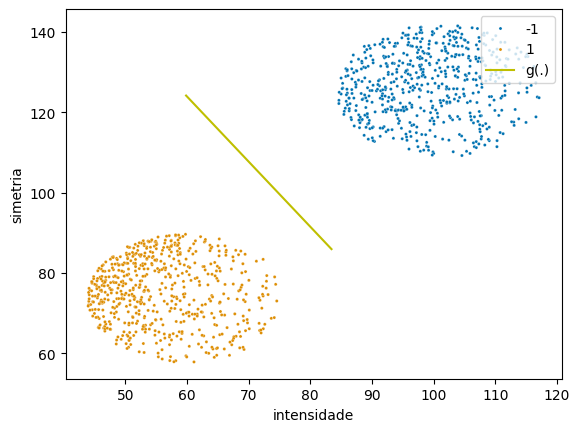

In [66]:
import seaborn as sns

xmin = x_train[:,1].min()
xmax = x_train[:,1].max()

sns.scatterplot(x='intensidade', y='simetria', hue=y_pred_treino.flatten(), data=train1x5, palette='colorblind', s=5)

x = np.linspace(xmin, xmax, 100)
y = -(W[0][0] * x + B) / W[1][0]

plt.plot(x, y, 'y-', label='g(.)')
plt.legend(loc='upper right')
plt.show()

## Eficiência da Classificação

In [67]:
from sklearn.metrics import confusion_matrix

#convertendo em vetores 1D
y_train_f = y_train.flatten()
y_pred_treino_f = y_pred_treino.flatten()

cm = confusion_matrix(y_train_f, y_pred_treino_f)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['1', '5'], 
            yticklabels=['1', '5'])
plt.xlabel('Predição')
plt.ylabel('Rótulos')
plt.title('Matriz de Confusão - Treino')
plt.show()


              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       576
           1       1.00      1.00      1.00       608

    accuracy                           1.00      1184
   macro avg       1.00      1.00      1.00      1184
weighted avg       1.00      1.00      1.00      1184



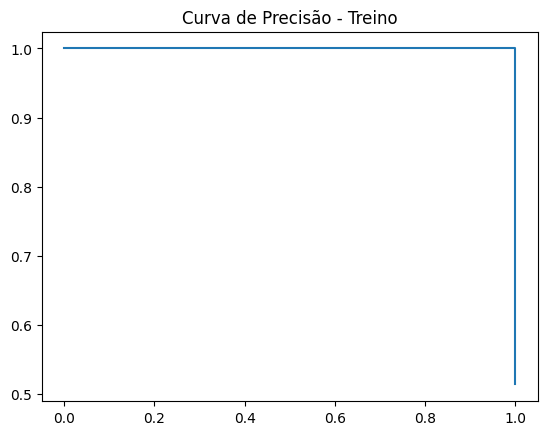

In [68]:
from sklearn.metrics import precision_recall_curve, classification_report

report = classification_report(y_train_f, y_pred_treino_f)
#precisão x sensibilidade*
precision, recall, _ = precision_recall_curve(y_train_f, y_pred_treino_f)

print(report)

plt.plot(recall, precision)
plt.title('Curva de Precisão - Treino')
plt.show()

In [69]:
acuracia(y_train, y_pred_treino, "teste")

Acuracia do modelo no conjunto teste:  100.0 %


In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('Metricas de Erro - Treino')
print("Erro médio quadrático: ", mean_squared_error(y_train, y_pred_treino))
print("Erro médio absoluto: ", mean_absolute_error(y_train, y_pred_treino))

Metricas de Erro - Treino
Erro médio quadrático:  0.0
Erro médio absoluto:  0.0


## Teste

In [71]:
y_pred_teste = rl.predict(x_test)

In [72]:
xmin = x_train[:,1].min()
xmax = x_train[:,1].max()

sns.scatterplot(x='intensidade', y='simetria', hue=y_pred_teste.flatten(), data=test1x5, palette='colorblind', s=5)

x = np.linspace(xmin, xmax, 100)
y = -(W[0][0] * x + B) / W[1][0]

plt.plot(x, y, 'y-', label='g(.)')
plt.legend(loc='upper right')
plt.show()

In [73]:
y_test_f = y_test.flatten()
y_pred_teste_f = y_pred_teste.flatten()


cm_test = confusion_matrix(y_test_f, y_pred_teste_f)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['1', '5'], 
            yticklabels=['1', '5'])
plt.xlabel('Predição')
plt.ylabel('Rótulos')
plt.title('Matriz de Confusão - Teste')
plt.show()

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       291
           1       1.00      1.00      1.00       292

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583



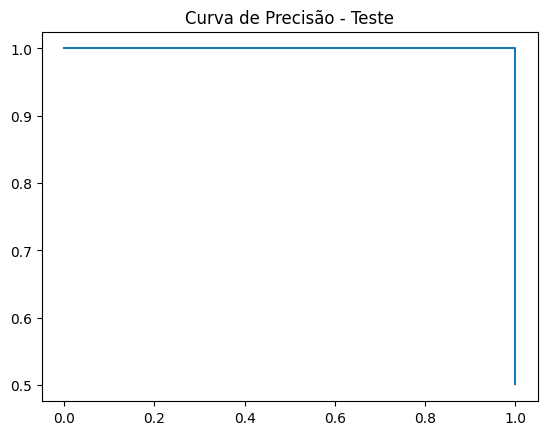

In [74]:
report_test = classification_report(y_test_f, y_pred_teste_f)

precision_test, recall_test, _ = precision_recall_curve(y_test_f, y_pred_teste_f)

print(report_test)

plt.plot(recall_test, precision_test)
plt.title('Curva de Precisão - Teste')
plt.show()

In [75]:
acuracia(y_test, y_pred_teste, "treino")

Acuracia do modelo no conjunto treino:  100.0 %


In [76]:
print('Metricas de Erro - Teste')
print("Erro médio quadrático: ", mean_squared_error(y_test, y_pred_teste))
print("Erro médio absoluto: ", mean_absolute_error(y_test, y_pred_teste))

Metricas de Erro - Teste
Erro médio quadrático:  0.0
Erro médio absoluto:  0.0


In [77]:
y_train

array([[ 1,  1,  1, ..., -1, -1, -1]])

## Métricas Gerais

In [78]:
#erro dentro da amostra (Ein)
N_in = len(y_train)
eIn = 0
for i in range(N_in):
    if(y_pred_treino[0][i] != y_train[0][i]):
        eIn += 1
eIn /= N_in
print("Ein = " + str(eIn))

#erro fora da amostra (Eout)
N_out = len(y_test)
eOut = 0
for i in range(N_out):
    if(y_pred_teste[0][i] != y_test[0][i]):
        eOut += 1
eOut /= N_out
print("Eout = " + str(eOut))

Ein = 0.0
Eout = 0.0


### Comparação com biblioteca pronta

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

model = LogisticRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)

report = classification_report(y_test, y_pred)

print('Acuracia:', accuracy)
print('Classificação:')
print(report)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predições')
plt.ylabel('Reais')
plt.title('Matriz de Confusão')
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [2, 1184]